### What is MS COCO? 
MS COCO (Microsoft Common Objects in Context) is dataset for object detection, segmentation, and keypoint detection. COCO DATASET is composed by image files and an annotation file. The annotation file has fields which are `info`, `licenses`, `images`, `annotations`, `categories`, and `segment_info`. The annotation file is a json which has 6 fields as below.

##### 1. Main section
The annotation file has 6 sections.
- `info`: The info section provides general information about each dataset. This section is not essential for a program.
- `licenses`: The licenses section provides details about licenses of images included in the dataset. This section is not essential for a program.
- `images`: The images section provides raw image information
- `annotations`: The annotations section provides a list of all object annotations for every image in the dataset.
- `categories`: The categories section contatins categories.
- `segment_info`: (to be described)

##### 2. Sub section
Each section contains sub fields as below.
- `info`: Any information for the dataset. For example,
  - `version`
  - `description`
  - `contributor`
  - `url`
- `lincenses`: This section is a list of licenses.
  - `license` 
    - `id`: ID of the license.
    - `name`: Name of the license.
    - `url`: URL of the license.
- `images`: This section is a list of images.
  - `image`
    - `id`: ID of the image.
    - `file_name`: File name of the image.
    - `height`: Height of the image.
    - `width`: Width of the image.
    - `license`: License ID (Optional)
    - `coco_url`: URL of coco (Optional)
    - `flickr_url`: URL for flickr (Optional)
    - `data_captured`: DATE when captured (Optional)
- `annotations`: This section is a list of annotations.
  - `annotation`
    - `id`: ID of the `annotation`
    - `image_id`: `id` of the `image` to matching
    - `category_id`: `id` of the `category` of the object
    - `iscrowd`: Whether objects are crowded
    - `area`: Area of the object
    - `bbox`: Bounding box coordinates for the object, `xywh` (`[x0, y0, width, height]`)
    - `segmentation`: Polygon for the object (`[[x0, y0, x1, y1, ..., xn, yn]]`)
- `categories`: This section is a list of categories.
  - `category`
    - `id`: ID of the `category`
    - `name`: Name of the `category`
    - `supercategory`: Supercategory of the `category`


### References
- https://mmdetection.readthedocs.io/en/latest/tutorials/customize_dataset.html
- https://www.immersivelimit.com/tutorials/create-coco-annotations-from-scratch
- Bolloon Dataset, https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip

### Convert to COCO Dataset

In [1]:
import json
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import Dict, Any
from pycocotools.coco import COCO

def convert_to_coco(
    src: str,
    dst: str
) -> None:
    with open(src) as f:
        data = json.load(f)

    annt_id = 0
    images = []
    annotations = []
    categories = [dict(id=0, supercategory="balloon", name="balloon")]
    licenses = [dict(id=0, url="https://github.com/matterport/Mask_RCNN/releases")]

    for key in data.keys():
        item = data[key]
        image_id = int(item["filename"].split("_")[0])

        image = dict(
            id=image_id,
            file_name=item["filename"],
            height=None,
            width=None,
            size=item["size"],
            license=0
        )
        
        _annotations = []
        for idx, i in enumerate(item["regions"].keys()):
            polygon = item["regions"][i]
            all_points_x = polygon["shape_attributes"]["all_points_x"]
            all_points_y = polygon["shape_attributes"]["all_points_y"]

            x0 = int(np.min(all_points_x))
            x1 = int(np.max(all_points_x))
            y0 = int(np.min(all_points_y))
            y1 = int(np.max(all_points_y))
            width = x1-x0
            height = y1-y0

            segmentation = []
            for x, y in zip(all_points_x, all_points_y):
                segmentation.append(x)
                segmentation.append(y)
            segmentation = [segmentation]

            annotation = dict(
                id=annt_id,
                image_id=image_id,
                category_id=0,
                is_crowd=0,
                area=width*height,
                bbox=[x0, y0, width, height],
                segmentation=segmentation
            )
            _annotations.append(annotation)
            annt_id += 1

        images += [image]
        annotations += _annotations

    coco = dict(
        licenses=licenses,
        images=images,
        annotations=annotations,
        categories=categories
    )
    
    with open(dst, "w", encoding="utf-8") as f:
        json.dump(coco, f)

### Examples

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


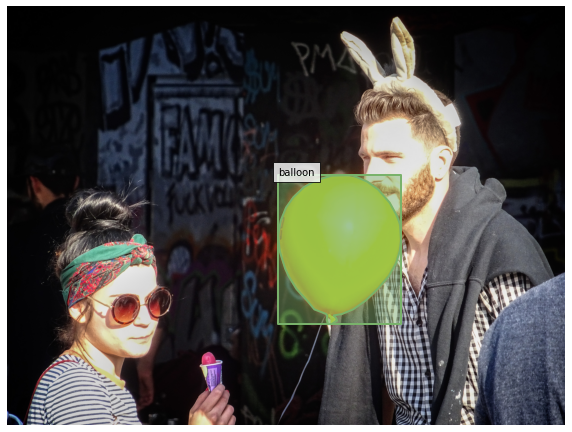

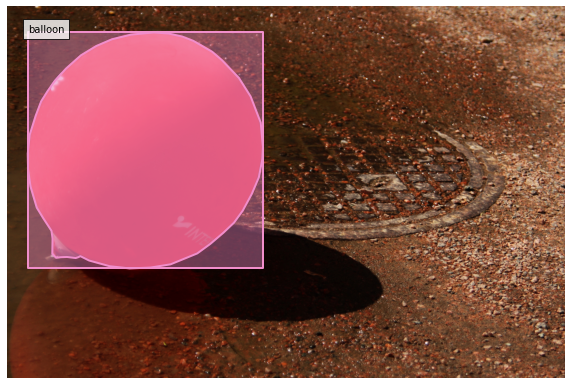

In [2]:
# make coco json file
convert_to_coco(
    "balloon/train/via_region_data.json",
    "balloon/train/train.json"
)
coco = COCO("balloon/train/train.json")

# draw graph
imgs = coco.loadImgs(list(coco.imgs.keys()))
np.random.seed(42)
np.random.shuffle(imgs)

for img in imgs[:2]:
    I = io.imread(os.path.join("balloon/train", img["file_name"]))

    fig, ax = plt.subplots(figsize=(10, 10))
    annIds = coco.getAnnIds(imgIds=img['id'])
    anns = coco.loadAnns(annIds)

    ax.imshow(I)
    ax.axis('off')
    coco.showAnns(anns, draw_bbox=True)
    for ann in anns:
        cat_ids = coco.getCatIds(catIds=ann["category_id"])
        cats = coco.loadCats(cat_ids)
        cat_name = cats[0]["name"]
        ax.text(ann['bbox'][0], ann['bbox'][1], cat_name, 
                bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    plt.show()

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


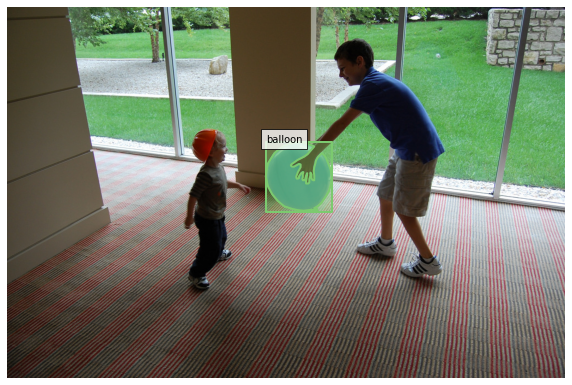

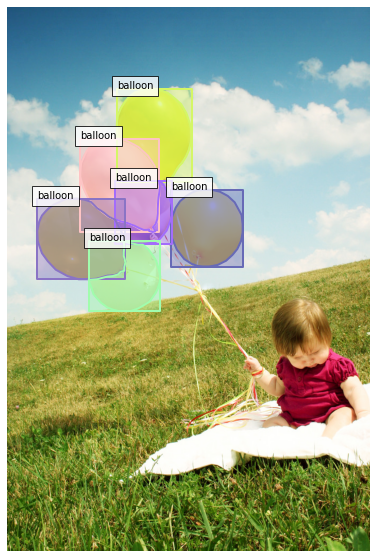

In [3]:
# make coco json file
convert_to_coco(
    "balloon/val/via_region_data.json",
    "balloon/val/val.json"
)
coco = COCO("balloon/val/val.json")

# draw graph
imgs = coco.loadImgs(list(coco.imgs.keys()))
np.random.seed(42)
np.random.shuffle(imgs)

for img in imgs[:2]:
    I = io.imread(os.path.join("balloon/val", img["file_name"]))

    fig, ax = plt.subplots(figsize=(10, 10))
    annIds = coco.getAnnIds(imgIds=img['id'])
    anns = coco.loadAnns(annIds)

    ax.imshow(I)
    ax.axis('off')
    coco.showAnns(anns, draw_bbox=True)
    for ann in anns:
        cat_ids = coco.getCatIds(catIds=ann["category_id"])
        cats = coco.loadCats(cat_ids)
        cat_name = cats[0]["name"]
        ax.text(ann['bbox'][0], ann['bbox'][1], cat_name, 
                bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    plt.show()